In [1]:
# allows to import own functions
import sys, os, re
root_project = re.findall(r'(^\S*TFM-master)', os.getcwd())[0]
sys.path.append(root_project)

from src.utils.help_func import results_searchcv, make_train_val_test, errors_distribution

In [2]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from scipy.stats import uniform, expon, randint, loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
import graphviz

In [3]:
df_i = pd.read_pickle(f'{root_project}/data/processed/features_model_rev4.pickle')
df_i

,i_country,R0,Tc,Tr,omega,inf_pow_1,inf_pow_2,mort_pow_1,mort_pow_2,mort_pow_3,limit_deaths,n_closed,react_time,total_infected,total_death,total_removed,betweenness,degree,closeness,country_pop
0,LBN,9.490802,2.214174,21.014286,0.069029,2.918571e+03,114.077951,0.007146,0.005701,0.048225,72,6,23,7.509688e+09,5.191675e+08,7.521476e+09,0.001057,0.270270,0.460581,6.848925e+06
1,KIR,3.161672,6.111805,19.323523,0.012080,1.265010e+05,291.642242,0.003715,0.002368,0.007072,872,2,2,7.166248e+09,8.694994e+07,7.201020e+09,0.000956,0.036036,0.391534,1.158470e+05
2,MOZ,16.439975,1.263448,20.771054,0.046275,8.045407e+04,2297.546954,0.002847,0.001771,0.026642,192,0,22,7.530737e+09,3.532065e+08,7.633573e+09,0.000059,0.054054,0.382759,2.949596e+07
3,ERI,2.141326,1.149404,2.461249,0.014779,5.593643e+03,196.917492,0.006883,0.009034,0.010026,511,9,28,6.401541e+09,9.461014e+07,6.402090e+09,0.000007,0.049550,0.368159,3.213972e+06
4,VCT,9.327237,1.192357,11.121400,0.058201,9.880857e+03,286.248927,0.013316,0.013809,0.044225,958,18,20,7.477989e+09,4.352523e+08,7.478614e+09,0.000035,0.040541,0.312236,1.102100e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229990,DEU,3.785275,4.754930,17.998719,0.292764,4.050000e+01,6.581081,0.065256,0.075975,0.211429,423,18,1,5.351671e+08,1.566770e+08,5.351670e+08,0.051624,0.864865,0.616667,8.292792e+07
229991,MHL,16.557036,0.732844,12.133717,0.957273,1.621672e+06,414061.131148,0.087902,0.079013,0.525821,953,2,14,7.529798e+09,7.285373e+09,7.610553e+09,0.003000,0.036036,0.387435,5.879100e+04
229992,HKG,5.901646,1.641050,9.684893,0.100018,3.583714e+03,306.239024,0.015367,0.012281,0.060047,293,9,20,7.493834e+09,7.499187e+08,7.498033e+09,0.015386,0.378378,0.531100,7.451000e+06
229993,MMR,15.645535,0.928264,14.523181,0.903293,2.151143e+04,17638.718750,0.057810,0.030845,0.449975,390,6,18,7.508318e+09,6.793617e+09,7.520947e+09,0.000069,0.117117,0.393617,5.370840e+07


In [4]:
df_i = df_i.sample(1000) # par entrenar con menos muestras


features = ['Tr', 'inf_pow_1', 'inf_pow_2', 'mort_pow_1', 'mort_pow_2', 'mort_pow_3', 'limit_deaths',
           'n_closed', 'react_time','total_death', 'betweenness', 'degree', 'closeness', 'country_pop']

df = df_i[features]

size_data = int(len(df) / 1000)
print(size_data)
df

1


,Tr,inf_pow_1,inf_pow_2,mort_pow_1,mort_pow_2,mort_pow_3,limit_deaths,n_closed,react_time,total_death,betweenness,degree,closeness,country_pop
189970,6.901428,8.662666e+06,1.735720e+06,0.008416,0.003304,0.043486,186,12,26,1.114650e+09,0.002821,0.085586,0.430233,181889.0
89532,15.279626,6.521228e+05,1.912494e+03,0.002128,0.002754,0.009349,883,14,16,9.205597e+07,0.000085,0.085586,0.419660,9100837.0
165532,2.377218,3.509423e+08,5.947201e+06,0.014376,0.018644,0.024087,822,15,15,3.551684e+08,0.000262,0.238739,0.459627,483530.0
99863,8.955679,7.124307e+04,7.230729e+03,0.024998,0.013960,0.101583,274,10,11,1.322455e+09,0.000082,0.027027,0.296395,112640.0
115924,21.291165,2.245714e+02,9.823059e-01,0.005089,0.009297,0.009901,420,12,29,1.290861e+08,0.000000,0.027027,0.421252,63918.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193046,19.679165,1.350000e+01,4.647059e+00,0.169312,0.202532,0.524590,821,20,29,3.145015e+09,0.000000,0.027027,0.351266,754394.0
221165,8.450421,2.771429e+01,1.266667e+01,0.164948,0.210526,0.365714,337,6,28,3.387887e+09,0.001091,0.063063,0.392226,111454.0
57663,6.664163,4.706939e+05,4.940604e+04,0.043551,0.053291,0.132277,884,9,19,1.552261e+09,0.000088,0.072072,0.405109,6315800.0
929,7.046239,6.192786e+05,2.480277e+05,0.041715,0.015849,0.178007,938,0,8,2.959049e+09,0.000000,0.081081,0.378194,631636.0


In [5]:
X_train_val, y_train_val, X_test, y_test = make_train_val_test(df, out_mode=1)

Train_validation set: (800, 13)
Test set: (200, 13)


In [6]:
param_dist = dict(
    max_depth=randint(low=8, high=18),
    min_samples_leaf=randint(2, 10),
)

random_search = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), param_distributions=param_dist, verbose=2,
                          n_iter=50, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

random_search.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.5s finished


RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f58f3d760d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f58f3d76430>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [7]:
results_searchcv(random_search, X_test, y_test)

Best score:
-7.248282280051576e+17
Best parameters found:
{'max_depth': 12, 'min_samples_leaf': 8}
Score in test:
-8.575607559527844e+17
R^2 in test
0.6791804637211047
MAE in test:
486072577.5080127


In [12]:
dot_data = tree.export_graphviz(random_search.best_estimator_, feature_names=X_train_val.columns, filled=True, out_file="tree.dot")

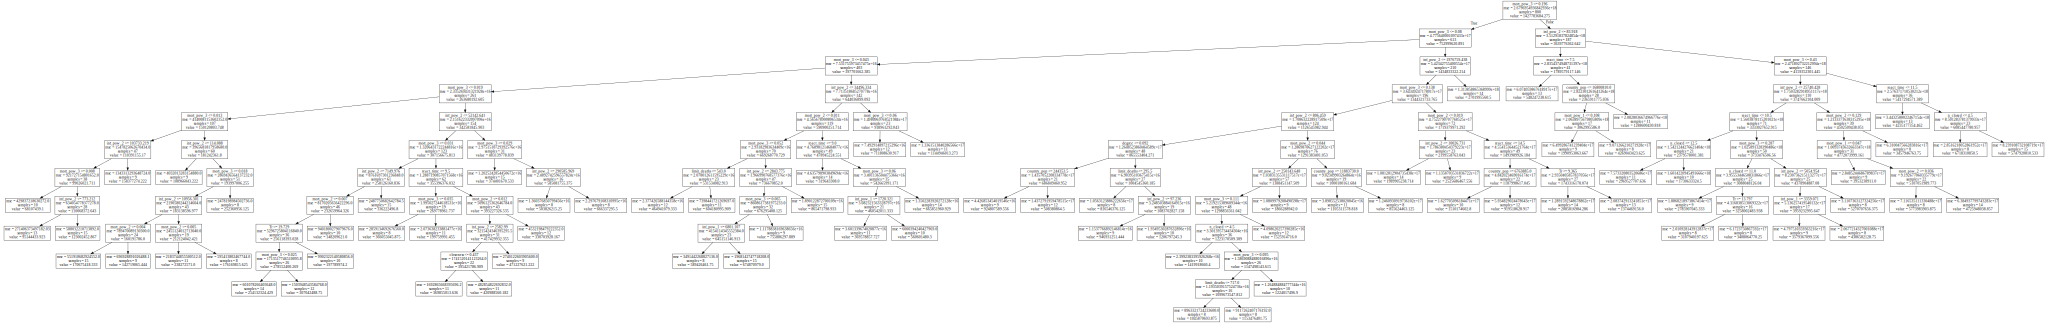

In [11]:
graph = graphviz.Source(dot_data)
graph